# Voided Drilled Shafts

## Background

Drilled shafts are frequently used as foundations for electrical transmission structures.  A known problem with such foundations is that the heat of hydration builds up to sufficient temperatures to inhibit the formation of ettringite.  This leads to a problem called delayed ettringite formation (DEF).  The process is as follows.

1. Concrete reaches a temperature exceeding 70 degrees C (160 degrees F) for an extended period of time.

2. Concrete later cools below the threshold temperature.

3. Provided water is present, ettringite beings to form within the hardened concrete matrix.

4. The expansive mineral growth causes tensile stresses to build up in the concrete, leading to cracking which can be severe.

## Python

This is a Jupyter notebook.  It uses Python 3.6.8 as its kernel.  The author developed a library of code to plot cross-sections and interaction diagrams for circular concrete columns. The following block of Python code validates the library by a comparison to a numerical example problem in the 2008 CRSI Manual.

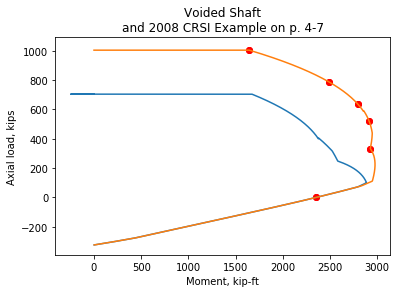

In [6]:
%matplotlib inline
import sys; sys.path.append("/Users/joelegner/Google Drive/Projects/Self-Directed Study/voided_shaft")

import math
import os
import unittest

from matplotlib import pyplot as plt

from leglib.structural.acibars import a615_grade60, bars
from leglib.structural.concrete import Concrete
from leglib.util import almost_equal
from models.voidedshaft import VoidedShaft
from views.voidedshaft_views import plot_voided_shaft


def plot_interaction(shaft):

    SEGMENTS = 400

    xs = [0.0]
    ys = [shaft.phiPnmax()/1000.0]

    shaft.c = shaft.D*1.5

    phiPn_max = 0.0
    phiMn_max = 0.0

    while (shaft.D - 2.0*shaft.a)/shaft.D < 1.0:

        if (shaft.D - 2.0*shaft.a)/shaft.D < -1.0:
            shaft.c = shaft.c - shaft.D/SEGMENTS
            continue

        phiMn = shaft.phiMn()/1000.0
        phiPn = shaft.phiPn()/1000.0

        # print("c = {}, phiMn = {}, phiPn = {}".format(shaft.c, phiMn, phiPn))

        xs.append(phiMn)
        ys.append(phiPn)
        phiPn_max = max(phiPn_max, phiPn)
        phiMn_max = max(phiMn_max, phiMn)

        shaft.c = shaft.c - shaft.D/SEGMENTS

    plt.plot(xs, ys)

    plt.scatter(1645.0, 1004.0, color="red")
    plt.scatter(2353.0, 0.0, color="red")
    plt.scatter(2487.0, 789.0, color="red")
    plt.scatter(2794.0, 638.0, color="red")
    plt.scatter(2913.0, 523.0, color="red")
    plt.scatter(2927.0, 333.0, color="red")
    return (phiMn_max, phiPn_max)


test_shaft = VoidedShaft(D=20.0, Di=12.0)
test_shaft.n = 6
test_shaft.bar = bars["#9"]
test_shaft.cover = 1.5
test_shaft.tiebar = bars["#3"]
test_shaft.concrete.fc = 6000.0
test_shaft.c = 20.51791

# Draw a cross-section
# plot_voided_shaft(test_shaft, cross_section_filename)

# Plot results with void first
plt.clf()
phiMn_max, phiPn_max = plot_interaction(test_shaft)

# Re-run same shaft without void and plot over top of same diagram
test_shaft.Di = 0.0
phiMn_max, phiPn_max = plot_interaction(test_shaft)

# Add titles and save
plt.title("Voided Shaft\nand 2008 CRSI Example on p. 4-7")
plt.xlabel("Moment, kip-ft")
plt.ylabel("Axial load, kips")
plt.show()



The interaction diagram includes points from an example problem in the 2008 CRSI Manual to validate that the program is correctly generating the interaction diagram.

## Real-World Example

We will look at a real-world design for Tampa Electric Company at their Big Bend Station in Apollo Beach, Florida.  The subject structure is a 100-foot monopole 230 kV transmission structure.  Problem inputs were obtained from an analysis of the pole:

* Shear due to pole (wind) = 40 kips

* Shear due to attachments = 15 kips

* Ground line moment (GLM) due to pole (wind) = 2450 kip-ft

* GLM due to attachments = 2550 kip-ft

* Vertical downward load = 30 kips

Anchor bolts for the structure are on a 7-foot diameter circle.  To maintain sufficient anchor bolt edge distance, a drilled shaft diameter of 9 feet was selected.  This is a large enough shaft that DEF is a concern.

Per the foundation design calculation:

> Since the applied axial loads (30 kips compression) are quite small for this 9-foot diameter drilled pier, there is no need to check the allowable axial capacities.  Therefore, this calculation does not include axial analysis.

    

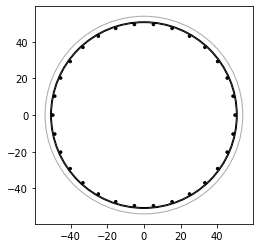

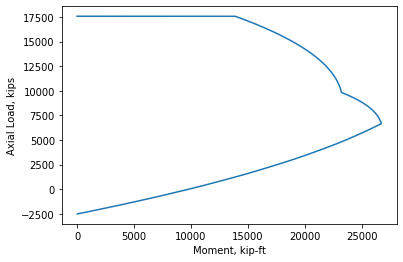

In [2]:
from models.voidedshaft import VoidedShaft
from views.voidedshaft_views import plot_interaction_diagram, plot_voided_shaft


# Plot the foundation cross-section
plt.clf()

# Information from Sargent & Lundy calculation number TEC-S-G-006, Rev. 0
shaft = VoidedShaft(D=108.0, Di=0.0)
shaft.n = 30
shaft.steel.fy = 60000.0
shaft.concrete.fc = 4000.0
shaft.cover = 3.0
shaft.set_bar_size("#11")
shaft.set_tiebar_size("#4")

plot_voided_shaft(shaft)
plt.show()

# And plot the interaction diagram, too
plt.clf()
phiMn_max, phiPn_max = plot_interaction_diagram(shaft)
plt.show()

## Adding a Void to the Shaft

Let us add a 48-inch diameter void to the same shaft, plot the cross-section, and plot the interaction diagram over top of the non-voided version.

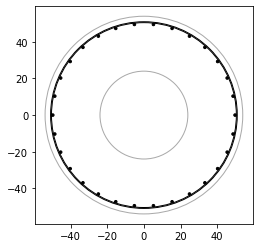

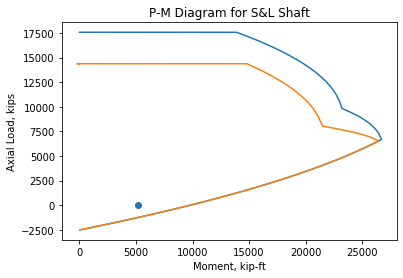

In [4]:
# Plot cross-section
plt.clf()
shaft.Di = 48.0
plot_voided_shaft(shaft)
plt.show()

# Plot interaction diagram for non-voided and voided
plt.clf()
shaft.Di = 0.0
phiMn_max, phiPn_max = plot_interaction_diagram(shaft)
shaft.Di = 48.0
phiMn_max, phiPn_max = plot_interaction_diagram(shaft)

# Add point from calculation
# M = 5196 kip-ft ground-line moment
# P = 30 kips downward axial load
plt.scatter((5196.0), 30.0)

# Add titles and save
plt.title("P-M Diagram for S&L Shaft")
plt.show()

The load combination point falls within the interaction diagram, so the design passes.